# Introduction

I work in a primary school in which we administer standardised tests of maths attainment to children at two class levels. The school has DEIS band 1 status, which provides us with extras resources to help support schools in areas of high social disadvantage.In this way it is hoped that these schools can help to bridge the achievment gap between their students and those with a higher socio-economic status. 

One way in which we use this data is to evaluate interventions that we provide to narrow this gap. Of course there are many variables that affect the level of attainment of our pupils. In this project, I have attempted to identify some of these and to simulate data that may show how they relate to standardised test scores. 

I have chosen the following variables to simulate:

1. Score in a standardised test of Mathematics attainment.
2. Records of non-attendance at school.
3. Birth month.
4. Class level. 

I will first simulate a score in a standardised maths test for 200 random students.I will the explore how test scores are affected by attendance, birth month and class level to simulate a score for 200 pupils in the DEIS school in which I work.

The test score variable will be a non-negative real number. The attendance variable will be a non-negative integer.The birth month variable will be an integer with values ranging from 1 to 12 inclusive to represent months of the year (1 = January). The class level variable will be a categorical variable with one of two values, 2nd or 6th. 

# Score in a standardised test of attainment

The SIGMA-T is a nationally standardised norm-referenced mathematics test with a mean standard score of 100 and standard deviation of 15. I used these parameters to first simulate a test score for 200 random pupils. The first 5 rows of the resulting dataframe are displayed along with a histogramof the data.

,score
0,126.460785
1,106.002358
2,114.681070
3,133.613398
4,128.013370


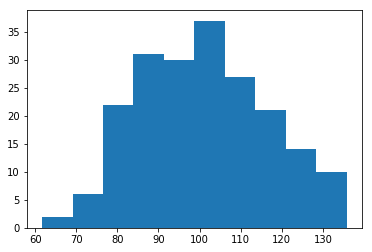

In [44]:
import numpy as np # import numpy package as np
import matplotlib.pyplot as plt # import pyplot package for plotting from matplotlib as plt
import pandas as pd # import pandas package for data manipulation as pd
# Set the seed so that the numbers can be reproduced.
np.random.seed(0)
mu, sigma = 100,15 # mean and standard deviation for a normal distribution
s = np.random.normal(mu, sigma, 200) # # draw 200 samples from normal distribution with mean = 100, standard deviation = 15
# assign to variable s
df = pd.DataFrame(data=s, columns = ["score"]) # create one dimensional dataframe using data in s 
# with column heading "score"; assign to variable df
plt.hist(s) # show histogram of s
df.head() # prinf girst 5 values of df


# Records of attendance

A [report on attendance](https://www.tusla.ie/uploads/content/School_Attendance_Data_2015-16.pdf) in DEIS schools was provide to Túsla, the child and family agency, by the Education Research Centre. The mean percentage of days lost by pupils in DEIS band 1 primary schools in the school year 2015/2016 was 8.1% with a standard deviation of 2.76 (from 174 schools sampled).


I wanted to create a column in my dataframe that simulated amount of days missed in a year for 200 pupils in DEIS primary schools. I felt that this could be modelled as a poisson process since, though pupils are sometimes absent for consecutive days due to illness, the pattern of absenteeism usually appears random when rates are high. Pupils with high absence rates often miss single days in isolation with no apparent pattern, thus satisfying the condition for a poisson process that events are independent of each other. 

,score,attendance
0,126.460785,25
1,106.002358,12
2,114.681070,17
3,133.613398,12
4,128.013370,7


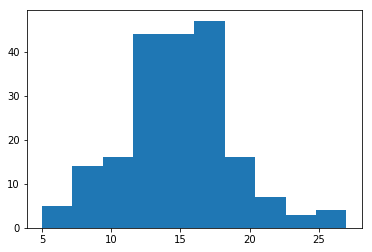

In [45]:
attendance = np.random.poisson(15, 200) # draw 200 numbers from poisson distribution with average number of successes = 15 
# assign to variable "attendance"
df["attendance"] = attendance # add variable "attendance" to dataframe "df" under column heading "attendance"
plt.hist(attendance) # show histogram of birth_month
df.head() # display first 5 rows of dataframe


# Birth Month

In the UK, chldren must start formal schooling in the Septenber after they turn 4 years old. [Research](https://www.ifs.org.uk/bns/bn122.pdf) by the Institute of Fiscal Studies for the Nuffield Foundation investigated the impact of date of birth on educational outcomes in England. They foind that children born in August scored, on average, over half a standard deviation lower than chldren born in September on standardised tests of academic attainment at age 7.

I wanted to create a column in my datframe that simulated birth month of the students. I used integers 1 - 12 as dummy variables to represent the months September - August

,score,attendance,Birth_month
0,126.460785,25,5
1,106.002358,12,7
2,114.681070,17,1
3,133.613398,12,7
4,128.013370,7,7


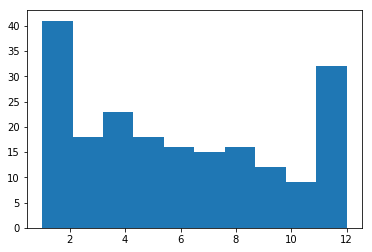

In [46]:
birth_month = np.random.randint(1,13,200)  # draw 200 integers from uniform distribution with range 1 -12(inclusive)
# assign to variable birth_month
df["Birth_month"] = birth_month # add variable "birth_month" to dataframe "df" under column heading "Birth_month"
plt.hist(birth_month) # show histogram of birth_month
df.head() # display first 5 rows of dataframe

# Class Level
Mean standard scores vary in DEIS schools by class level. In 2006, for example, the mean standard score in a 2nd Class in a DEIS school was 97.2, while the mean standard score in a 6th class was 95.9. I wanted to create a column in my dataframe that simulated the class level of the students tested

In [47]:
level = ["2nd", "6th"] # create array populated by class levels in sample
class_level = np.random.choice(level, 200,p=[0.5, 0.5]) # generates random sample (size 200, probabilty 0.5) 
# from the "level" array and assigns to variable "class_level"
df["Class_level"] = class_level # add variable class_level to dataframe "df" under column heading "Class_level"
df.head() # display first 5 rows of dataframe

,score,attendance,Birth_month,Class_level
0,126.460785,25,5,6th
1,106.002358,12,7,6th
2,114.681070,17,1,2nd
3,133.613398,12,7,6th
4,128.013370,7,7,2nd


# The Dataset

A team of researchers evaluated the impact of absences on a third grade (equivalent to 2nd class) test of mathematics attainment for more than 340,000 students in Wisconsin. After controlling for socio-economic status, each day of absence correlated with a 0.4 reduction in maths scores. Using the data from the ERC I assumed that the mean amount of absences for my students was 15. For each day over 15 missed, I added 0.4 to the etst score variable, and for each day less I subtracted 0.4. This gave me an algorithm for the effect of attendance on my test scores:
new test score = score + ((15 - attendance) x 0.4)

Given that children born in september score, on average, over half a standard deviation higher than those born in August, I assumed that the children born in September in my sample scored 15/2 points higher than those born in August - 15 being the standard deviation of the sample. I then assumed that in each birth month subsequent to February(the 6th month), scores would reduce by (15/2)/11 = 15/22 and that in each month previous to this scores would decrease by the same amount. This led me to modify my algorithm as follows:

new test score = score + ((15 - attendance) x 0.4) + ((6 - Birth month) x (15/22)) 

Mean standard scores in tests of mathematics attainment are lower in DEIS schools and vary by class level as described in the section on class level above. To account for this in my algorithm I subtracted 2.8 from the score for 2nd class pupils and subtracted 4.1 for 6th class pupils. The following piece of code shows the completed algorithm which takes into account the effect of birth month, attendance and class level on standardised test scores for puils in a DEIS band 1 school in order to simulate the dataset describing the phenomenon. 






In [62]:

# https://stackoverflow.com/questions/52457656/using-conditional-if-else-logic-with-pandas-dataframe-columns


def test_score(df):
    if df["Class_level"] == "2nd":
        return df["score"] + ((6 - df["Birth_month"]) * (15/22)) + ((15 - df["attendance"]) * 0.4) - 2.8
    elif df["Class_level"] == "6th":
        return df["score"] + ((6 - df["Birth_month"]) * (15/22)) + ((15 - df["attendance"]) * 0.4) - 4.1
    

df['test_score'] = df.apply(test_score, axis=1)
df

,score,attendance,Birth_month,Class_level,test-score,test_score
0,126.460785,25,5,6th,123.142603,119.042603
1,106.002358,12,7,6th,106.520540,102.420540
2,114.681070,17,1,2nd,117.290161,114.490161
3,133.613398,12,7,6th,134.131580,130.031580
4,128.013370,7,7,2nd,130.531552,127.731552
5,85.340832,16,11,2nd,81.531741,78.731741
6,114.251326,12,3,2nd,117.496781,114.696781
7,97.729642,16,9,6th,95.284187,91.184187
8,98.451717,13,7,6th,98.569899,94.469899
9,106.158978,15,7,2nd,105.477159,102.677159
